## Install

In [1]:
%pip install nltk
%pip install seaborn
%pip install pandas
%pip install nltk
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bartek\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from nltk import ngrams

## Config

In [3]:
data_dir = "./data"
train_path = f"{data_dir}/train.csv"
test_path = f"{data_dir}/test.csv"

## Load train dataset

In [4]:
train_df = pd.read_csv(train_path)
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Dataset statistics

In [5]:
train_df.shape

(7613, 5)

In [6]:
train_df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
col_id = 'id'
col_keyword = 'keyword'
col_location = 'location'
col_text = 'text'
col_target = 'target'

target_non_disaster = 0
target_disaster = 1

In [9]:
train_df.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [10]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
train_df.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


### Sample keyword column

In [12]:
train_df[col_keyword].sample(n=10)

1041    body%20bags
6191         sirens
2438       derailed
1113         bombed
1606       collapse
517       avalanche
1817        crashed
1137        bombing
3298       evacuate
389           arson
Name: keyword, dtype: object

### Sample location column

In [13]:
train_df[col_keyword].sample(n=10)

4406         hijacking
1266            burned
4605            injury
4327            hijack
6474              sunk
2024            danger
697            blazing
512           attacked
3738              fire
4065    forest%20fires
Name: keyword, dtype: object

## EDA

## Data cleaning

In [14]:
def text_preproc(df: pd.DataFrame):
    temp_df = df
    temp_df = temp_df.str.lower()
    temp_df = temp_df.str.replace("\n", " ")
    temp_df = temp_df.str.replace('%20', ' ')
    temp_df = temp_df.str.replace(',', ' ')
    temp_df = temp_df.str.replace('-', ' ')
    temp_df = temp_df.str.replace('\s+', ' ', regex=True)
    temp_df = df.str.strip()
    return temp_df

train_df[col_keyword] = text_preproc(train_df[col_keyword])
train_df[col_location] = text_preproc(train_df[col_location].fillna(""))
train_df[col_text] = text_preproc(train_df[col_text])

In [15]:
train_df[col_keyword].sample(n=10)

5168            obliterate
3815    first%20responders
6371        suicide%20bomb
5805               rioting
4907              massacre
6699               thunder
6787               tragedy
3979              flooding
6679               thunder
3352             evacuated
Name: keyword, dtype: object

In [16]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,,All residents asked to 'shelter in place' are ...,1
3,6,NaN,,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,,Just got sent this photo from Ruby #Alaska as ...,1


In [17]:
train_df.nunique()

id          7613
keyword      221
location    3279
text        7503
target         2
dtype: int64

In [18]:
print("Decreased number of unique values in location column for about ~ 200")

Decreased number of unique values in location column for about ~ 200


In [19]:
def make_histogram(counts):
    words = [x[0] for x in counts]
    values = [int(x[1]) for x in counts]
    mybar = plt.bar(range(len(words)), values, color='green', alpha=0.4)

    plt.xlabel('Word Index')
    plt.ylabel('Frequency')
    plt.title('Word Frequency Chart')
    plt.legend()

    plt.show()

In [20]:
def vertical_bar_graph(x, y):
    plt.barh(x, y)
    plt.title('Store Inventory')
    plt.ylabel('Product')
    plt.xlabel('Quantity')
    plt.show()

## EDA

### Most common words

No handles with labels found to put in legend.


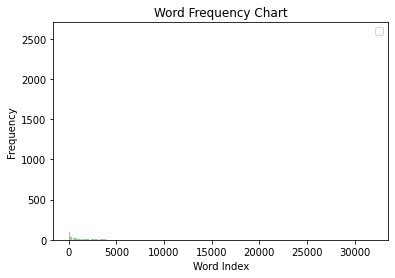

In [21]:
from collections import Counter
words_counter = Counter(" ".join(train_df[col_text]).split())
make_histogram(words_counter.most_common())

In [22]:
words = [word_counter[0] for word_counter in words_counter.most_common(10)]
words.reverse()

In [23]:
counters = [word_counter[1] for word_counter in words_counter.most_common(10)]
counters.reverse()

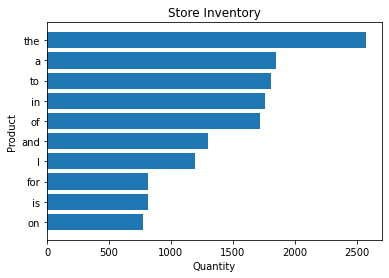

In [24]:
vertical_bar_graph(words, counters)

### Most common disaster words

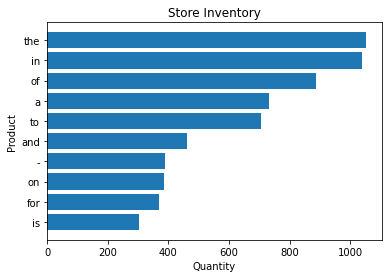

In [25]:
disaster_df = train_df.loc[train_df[col_target] == target_disaster][col_text]

words_counter_disaster = Counter(" ".join(disaster_df).split())

words = [word_counter[0] for word_counter in words_counter_disaster.most_common(10)]
words.reverse()

counters = [word_counter[1] for word_counter in words_counter_disaster.most_common(10)]
counters.reverse()

vertical_bar_graph(words, counters)

### Most common non-disaster words

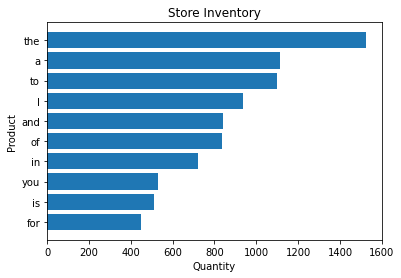

In [26]:
non_disaster_df = train_df.loc[train_df[col_target] == target_non_disaster][col_text]

words_counter_non_disaster = Counter(" ".join(non_disaster_df).split())

words = [word_counter[0] for word_counter in words_counter_non_disaster.most_common(10)]
words.reverse()

counters = [word_counter[1] for word_counter in words_counter_non_disaster.most_common(10)]
counters.reverse()

vertical_bar_graph(words, counters)

### Number of missed locations per target

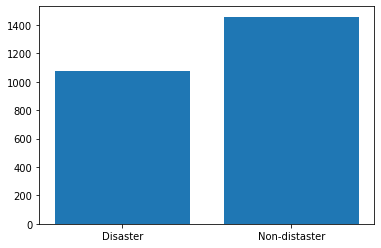

In [27]:
missed_location_df = train_df.loc[train_df[col_location] == ""]

disaster = missed_location_df.loc[missed_location_df[col_target] == target_disaster]
non_disaster = missed_location_df.loc[missed_location_df[col_target] == target_non_disaster]

x = ['Disaster', 'Non-distaster']
y_counts = [len(disaster.index), len(non_disaster.index)]

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y_counts)
plt.xticks(x_pos, x)
plt.show()

### Most common disaster locations

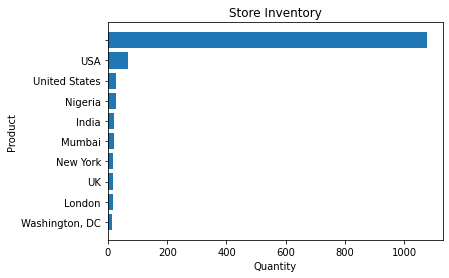

In [28]:
disaster_df = train_df.loc[train_df[col_target] == target_disaster][col_location].fillna("")


locations_counter_disaster = Counter(disaster_df)

locations = [location_counter[0] for location_counter in locations_counter_disaster.most_common(10)]
locations.reverse()

counters = [location_counter[1] for location_counter in locations_counter_disaster.most_common(10)]
counters.reverse()

vertical_bar_graph(locations, counters)

### Most common non-disaster locations

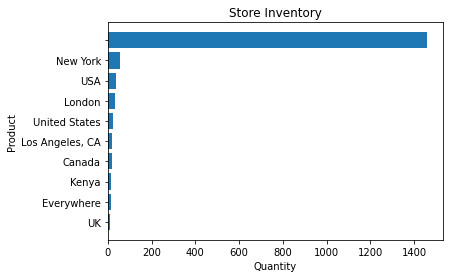

In [29]:
non_disaster_df = train_df.loc[train_df[col_target] == target_non_disaster][col_location].fillna("")


locations_counter_non_disaster = Counter(non_disaster_df)

locations = [location_counter[0] for location_counter in locations_counter_non_disaster.most_common(10)]
locations.reverse()

counters = [location_counter[1] for location_counter in locations_counter_non_disaster.most_common(10)]
counters.reverse()

vertical_bar_graph(locations, counters)

## FEATURE ENGINEERING

In [30]:
col_location_total_words = 'location_total_words'
col_text_total_words = 'text_total_words'
col_contains_url = 'contains_url'
col_text_word_counter = 'text_word_count'

In [31]:
def search_url(string):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)      
    result = [x[0] for x in url]
    return len(result) > 0

In [32]:
train_df[col_location_total_words] = train_df[col_location].str.split().str.len().replace(np.nan, 0)
train_df[col_text_total_words] = train_df[col_text].str.split().str.len().replace(np.nan, 0)
train_df[col_contains_url] = train_df[col_text].apply(search_url)
train_df[col_text_word_counter] = text_preproc(train_df[col_text]).apply(lambda x: len(x.split()))